## Olympics Dataset Analysis

*Libraries*

In [99]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

- read all needed files

In [100]:
bios_df = pd.read_csv("clean-data/bios.csv", sep = ',')
bios_Iocs_df = pd.read_csv("clean-data/bios_locs.csv", sep = ',')
noc_regions_df = pd.read_csv("clean-data/noc_regions.csv", sep = ',')
populations_df = pd.read_csv("clean-data/populations.csv", sep = ',')
results_df = pd.read_csv("clean-data/results.csv", sep = ',')

In [101]:
bios_df.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [102]:
bios_Iocs_df.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,lat,long
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,44.841225,-0.580036
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,49.004971,1.910084
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,43.471144,-1.552727
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,48.877480,2.317650
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,51.457027,-0.193261


In [103]:
noc_regions_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [104]:
populations_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [105]:
results_df.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN


- Medals Rankings

In [106]:
results_df.medal.unique()

array([nan, 'Bronze', 'Silver', 'Gold'], dtype=object)

In [107]:
medals = results_df[results_df["medal"].notna()]

# FILTER TEAM MEDALS 
models_filtered_team = medals.drop_duplicates(["year", "type", "discipline", "noc", "event", "medal"])

# FILTER YOUTH OLYMPIC GAMES
models_filtered_youth = models_filtered_team[~models_filtered_team["event"].str.endswith('YOG')]
models_filtered_youth.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
9,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean Borotra,3,FRA,René Lacoste,3.0,False,Bronze
12,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jacques Brugnon,4,FRA,Henri Cochet,2.0,False,Silver
14,1912.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Albert Canet,5,FRA,Marguerite Broquedis,3.0,False,Bronze
15,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Albert Canet,5,FRA,Édouard Mény de Marangue,3.0,False,Bronze
21,2000.0,Summer,Table Tennis,"Doubles, Men (Olympic)",Patrick Chila,7,FRA,Jean-Philippe Gatien,3.0,False,Bronze


In [108]:
models_filtered_youth.groupby(["noc"])["medal"].value_counts()

noc  medal 
AFG  Bronze    2
AHO  Silver    1
ALG  Bronze    8
     Gold      5
     Silver    4
              ..
ZAM  Silver    1
     Bronze    1
ZIM  Silver    4
     Gold      3
     Bronze    1
Name: count, Length: 384, dtype: int64

In [109]:
pivot_table = models_filtered_youth.pivot_table(index="noc", columns="medal", aggfunc="size", fill_value=0)


In [110]:
sorted_pivot_table = pivot_table.sort_values(by=["Gold", "Silver", "Bronze"], ascending=False)
sorted_pivot_table

medal,Bronze,Gold,Silver
noc,,,
USA,859,1201,972
URS,353,471,373
GER,371,365,384
GBR,347,319,342
CHN,206,318,243
...,...,...,...
GUY,1,0,0
IRQ,1,0,0
MON,1,0,0


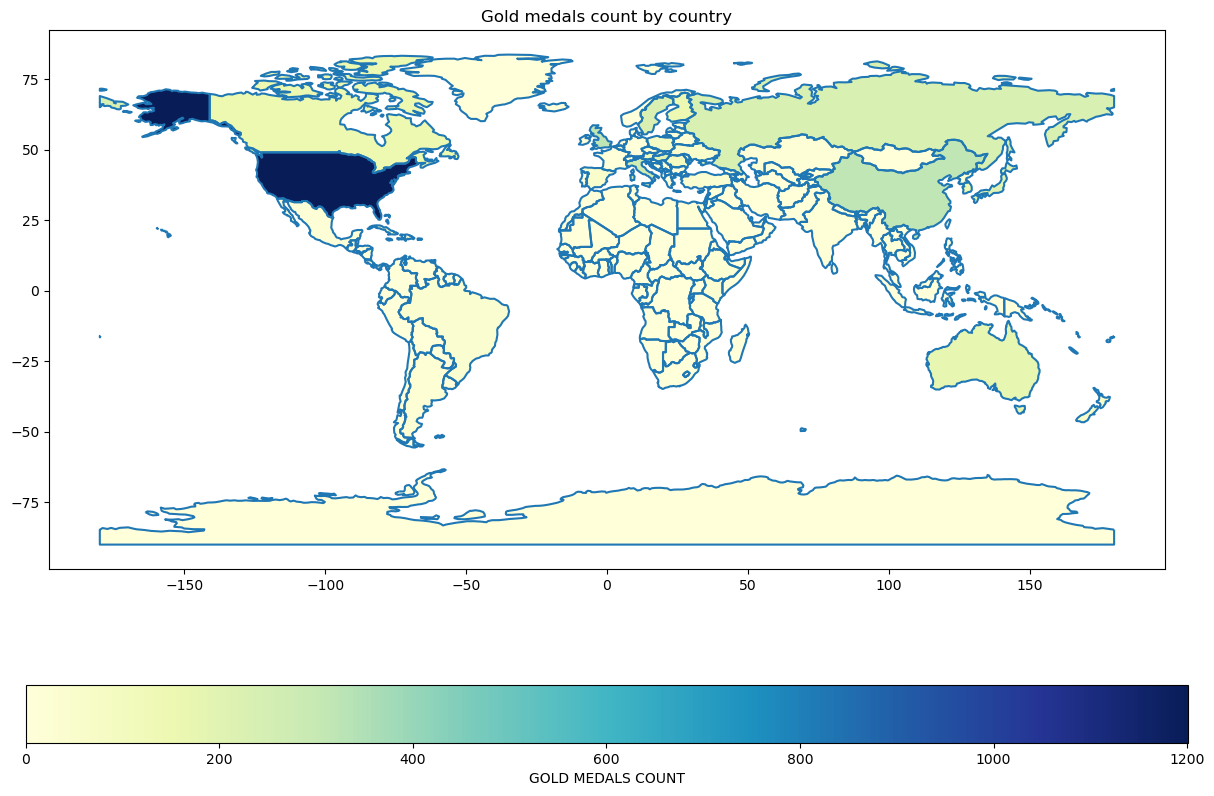

In [118]:
world = gpd.read_file("countries_map/ne_110m_admin_0_countries.shp")  
                                      
data = pivot_table.reset_index()

# CONNECT MEDAL DATA WITH COUNTRY ON THE MAP
world = world.merge(data, how="left", left_on="ISO_A3", right_on="noc") 

world["Gold"] = world["Gold"].fillna(0)

# VISUALIZATION
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column="Gold", ax=ax, legend=True,
           legend_kwds={'label': "GOLD MEDALS COUNT",
                        'orientation': "horizontal"},
           cmap='YlGnBu')

plt.title("Gold medals count by country")
plt.show()

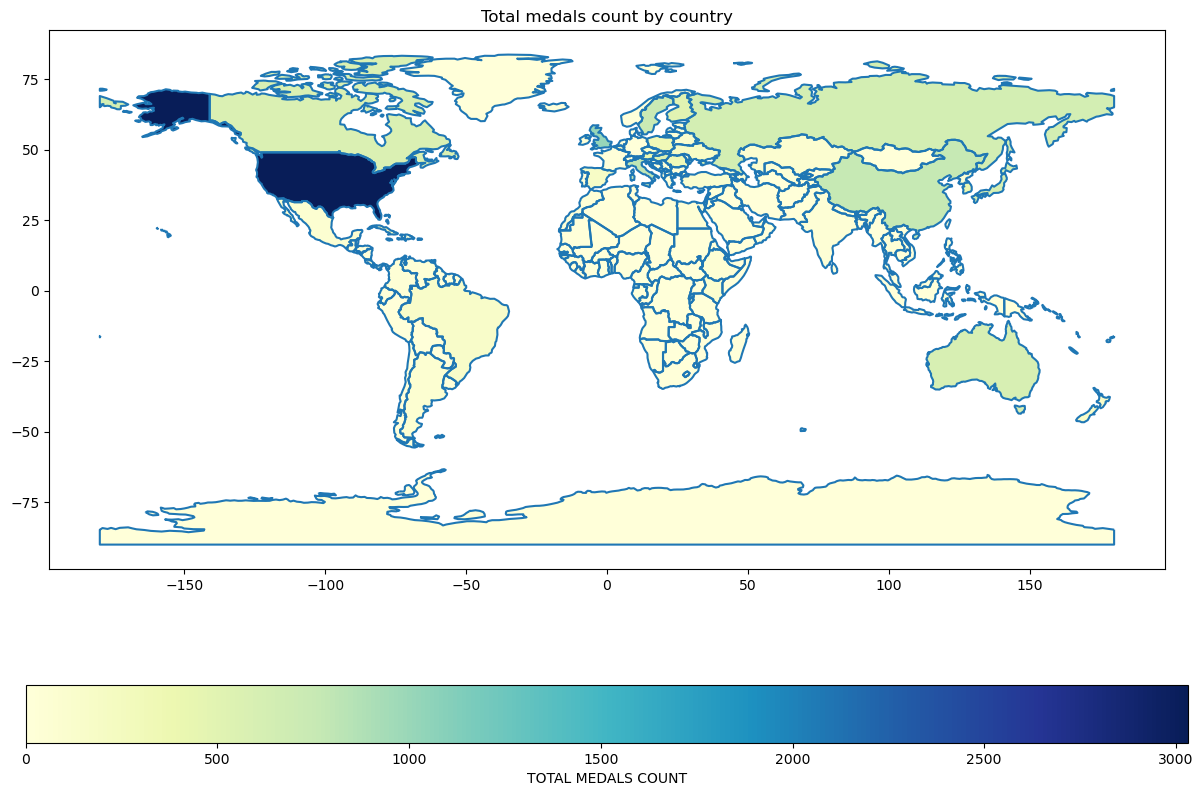

In [112]:
data = pivot_table.reset_index()

data['Total'] = data['Gold'] + data['Silver'] + data['Bronze']
world = world.merge(data, how="left", left_on="ISO_A3", right_on="noc")

world["Total"] = world["Total"].fillna(0)

# VISUALIZATION
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column="Total", ax=ax, legend=True,
           legend_kwds={'label': "TOTAL MEDALS COUNT",
                        'orientation': "horizontal"},
           cmap='YlGnBu')

plt.title("Total medals count by country")
plt.show()

In [113]:
olympic_years = [
    1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 
    1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 
    1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020
]

data = models_filtered_youth.pivot_table(index=["noc", "year"], columns="medal", aggfunc="size", fill_value=0).reset_index()

data['Gold'] = data.get('Gold', 0)
data['Silver'] = data.get('Silver', 0)
data['Bronze'] = data.get('Bronze', 0)
data['Total'] = data['Gold'] + data['Silver'] + data['Bronze']

data = data[data['year'].isin(olympic_years)]

# SUM OF MEDALS OVER THE YEARS
medal_table = data.pivot_table(index='year', columns='noc', values='Total', aggfunc='sum', fill_value=0)

medal_table = medal_table.reset_index()

medal_table.head()

noc,year,AFG,AHO,ALG,AND,ANZ,ARG,ARM,AUS,AUT,...,URS,URU,USA,UZB,VEN,VIE,WIF,YUG,ZAM,ZIM
0,1896.0,0,0,0,0,0,0,0,3,5,...,0,0,19,0,0,0,0,0,0,0
1,1900.0,0,0,0,0,0,0,0,4,6,...,0,0,51,0,0,0,0,0,0,0
2,1904.0,0,0,0,0,0,0,0,0,0,...,0,0,250,0,0,0,0,0,0,0
3,1908.0,0,0,0,0,5,0,0,0,1,...,0,0,46,0,0,0,0,0,0,0
4,1912.0,0,0,0,0,7,0,0,0,4,...,0,0,64,0,0,0,0,0,0,0


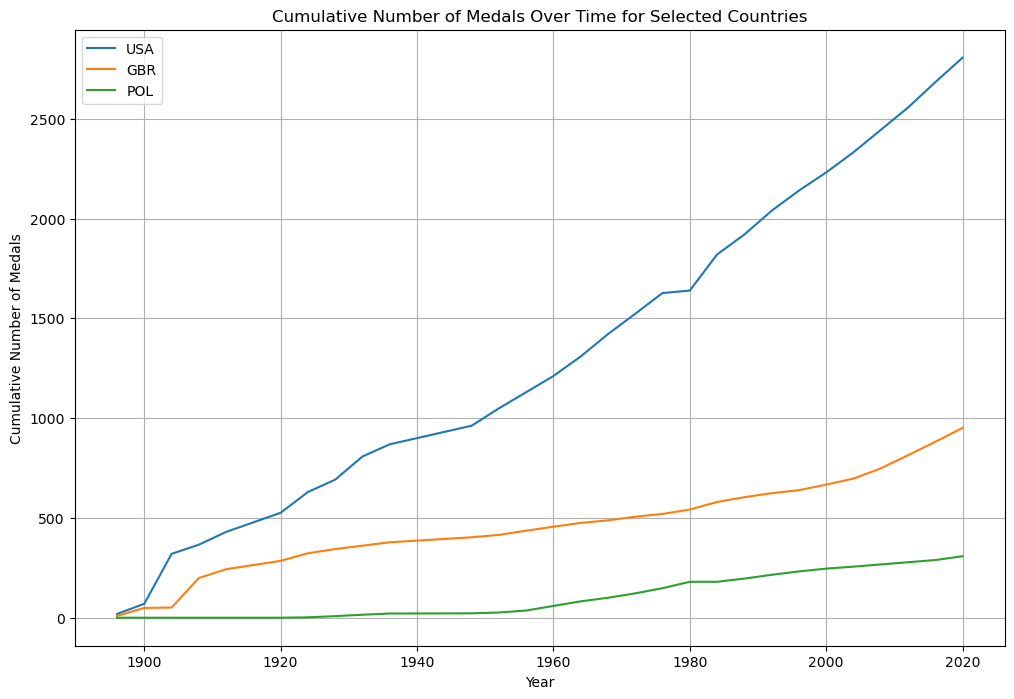

In [114]:
countries = ['USA', 'GBR', 'POL']

filtered_data = medal_table[['year'] + countries]

cumulative_data = filtered_data.copy()
for country in countries:
    cumulative_data[country] = cumulative_data[country].cumsum()

# VIS
plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(cumulative_data['year'], cumulative_data[country], label=country)

plt.xlabel('Year')
plt.ylabel('Cumulative Number of Medals')
plt.title('Cumulative Number of Medals Over Time for Selected Countries')
plt.legend()
plt.grid(True)
plt.show()

### GAM model for athleates avg age